In [1]:
# Imports
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
from scipy.stats import linregress as lr
from PIL import Image
from typing import List

    Image Shape  Image Dimension  Average Elevation  Minimum Elevation  \
0  (7996, 8132)                2         657.291626         -34.960938   

   Maximum Elevation  
0        1834.835938  


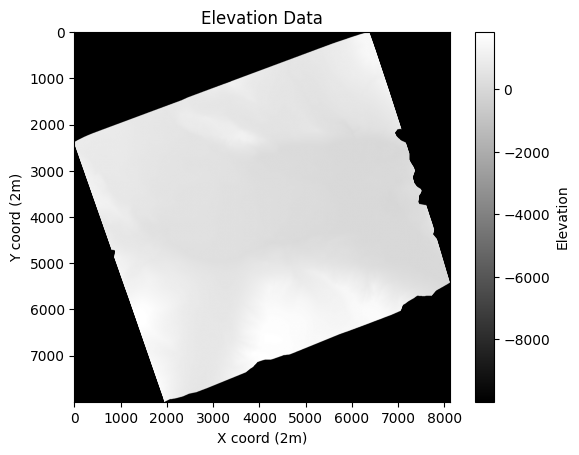

In [ ]:
# ArcticDEM data
Image.MAX_IMAGE_PIXELS = None
image = Image.open("datasets/11d471eb-0abf-4e1a-b6ae-fd693f1b30ed.tiff")

# Create mask
raster = np.array(image) # 1D array of the image
mask = ~(raster == -9999) # 1D array of T/F - False if data missing

# Image Data
shape = raster.shape
dimension = raster.ndim
average = np.mean(raster[mask])
low = np.min(raster[mask])
high = np.max(raster[mask])

# Print Image Data
arctic_dataframe = pd.DataFrame({"Image Shape": [shape], "Image Dimension": [dimension], "Average Elevation": [average], "Minimum Elevation": [low], "Maximum Elevation": [high]})
print(arctic_dataframe)

# Show Image
plt.imshow(raster, cmap='Accent')
plt.colorbar(label='Elevation')
plt.title('Elevation Data')
plt.xlabel('X coord (2m)')
plt.ylabel('Y coord (2m)')
plt.show()

# DEM strip and mosaic ﬁles are distributed at a ground sample distance (GSD) of 2 meters


In [3]:
# Box Counting
def box_count(raster: np.ndarray, mask: np.ndarray, box_size: List[int]):
    rows, cols = raster.shape
    total_box_count = 0 
    for size in box_size:
        for i in range(0, rows, size):
            for j in range(0, cols, size):
                end_row = min(i + size, rows)
                end_col = min(j + size, cols)

                current_slice = raster[i:end_row, j:end_col]
                current_mask = mask[i:end_row, j:end_col]

                valid_vals = current_slice[current_mask]
